In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cocoex

In [2]:
# 创建测试套件并获取问题实例
f = []
suite = cocoex.Suite("bbob", "year:2023", "dimensions: 2")
bounds = [(-5., 5.), ] * 2
for i in [0,7,6,9,13,17,18,21]:
    f.append(suite.get_problem(i*15))

mindata = [79.48000000407798,149.15138957895294,92.94000000100081,-54.906942117849695,-52.34983987581371,-16.904964276282467,-102.54972180473906,-999.9999996132141]

In [3]:
n_calls = 150

In [4]:
DF = {}
for i in range(8):
    noi = []
    obs = []
    pre = []
    count1 = 1
    count2 = 1
    count3 = 1
    with open ("Data\\noise2D\\Fn"+str(i)+"_noi.csv","r") as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if count1%n_calls==0:
                noi.append((f[i](data)-mindata[i])/abs(mindata[i]))
            count1 = count1+1
    with open ("Data\\noise2D\\Fn"+str(i)+"_obs.csv","r") as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if count2%n_calls==0:
                obs.append((f[i](data)-mindata[i])/abs(mindata[i]))
            count2 = count2+1
    with open ("Data\\noise2D\\Fn"+str(i)+"_pre.csv","r") as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if count3%n_calls==0:
                pre.append((f[i](data)-mindata[i])/abs(mindata[i]))
            count3 = count3+1

    DF['Fn'+str(i+1)] = [noi,obs,pre]

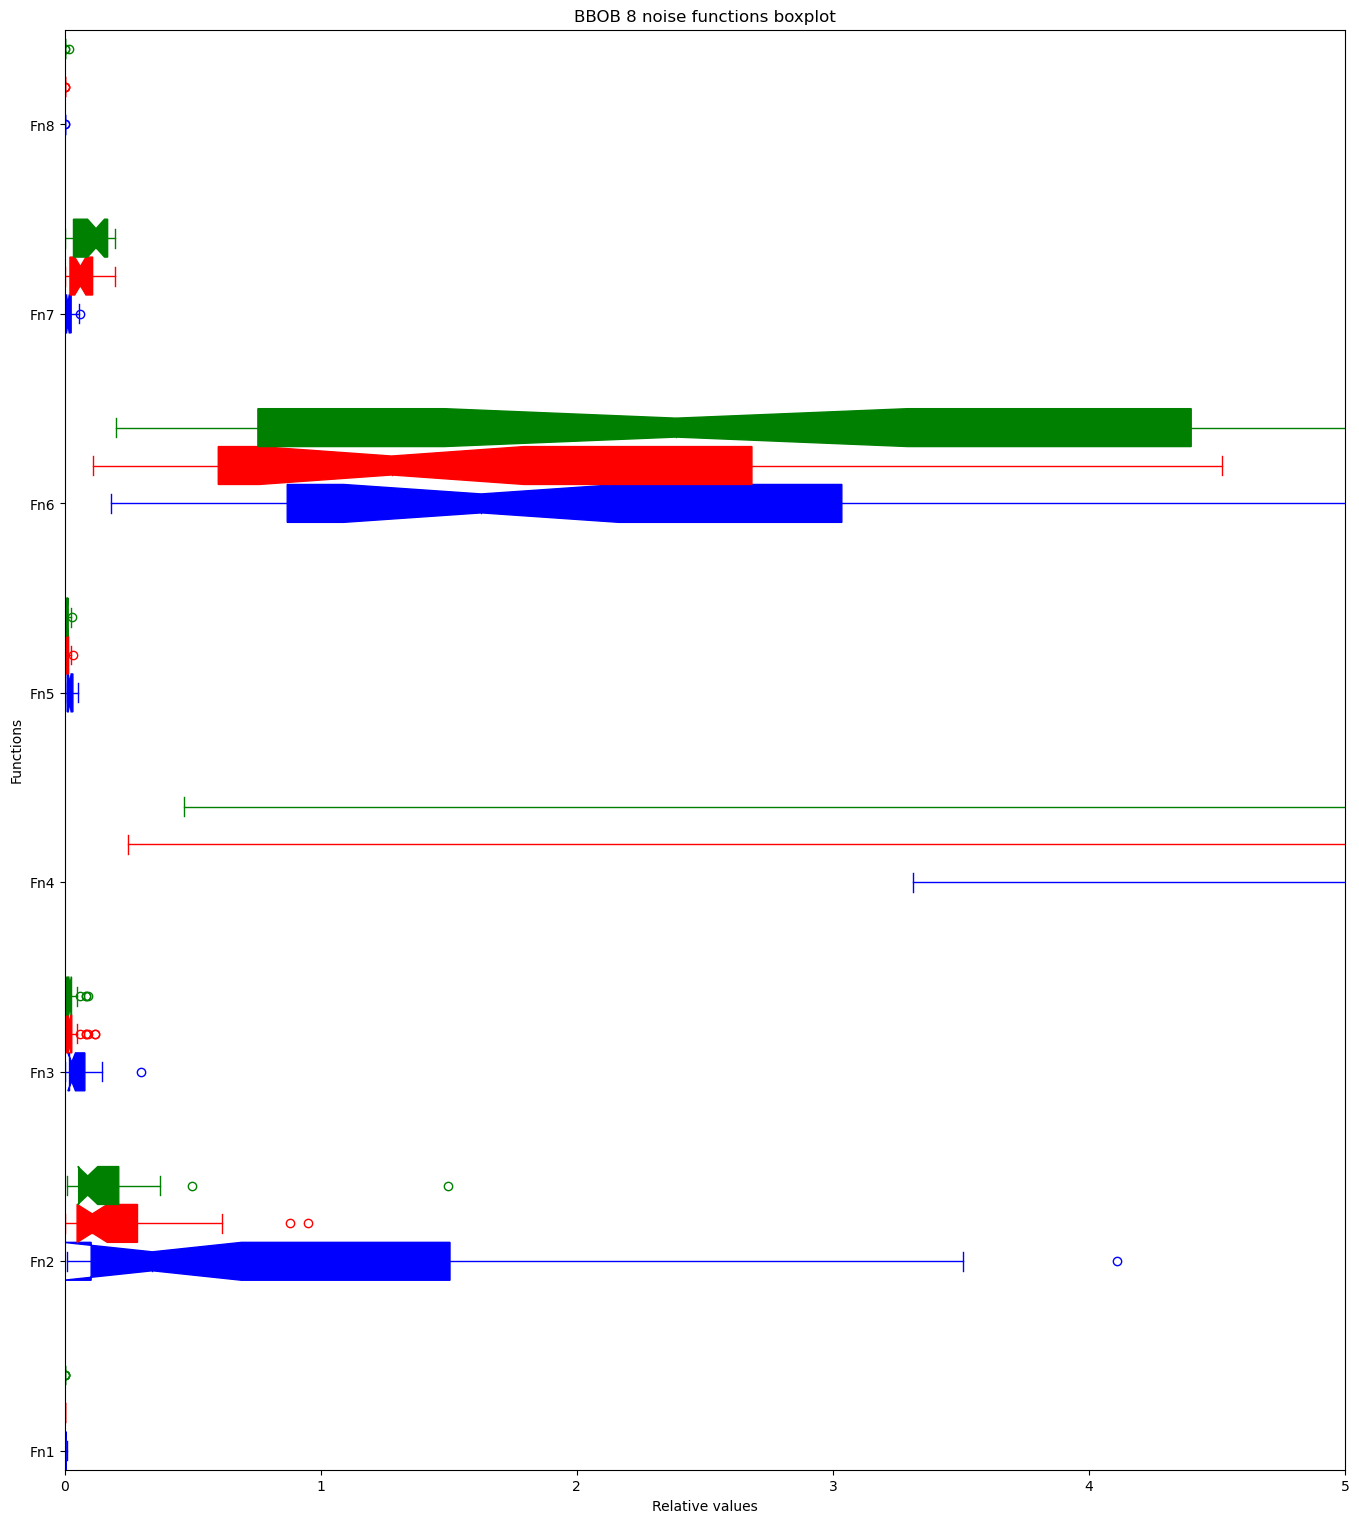

In [5]:
fig,ax = plt.subplots()

for idx,(func_name,func_data) in enumerate(DF.items()):
    position1 = [idx*5+1,]
    position2 = [idx*5+2,]
    position3 = [idx*5+3,]
    c1 = 'blue'
    c2 = 'red'
    c3 = 'green'
    ax.boxplot(func_data[0],positions=position1,vert=False,widths=1,notch=True, patch_artist=True,boxprops=dict(facecolor=c1, color=c1),
            capprops=dict(color=c1),whiskerprops=dict(color=c1),flierprops=dict(color=c1, markeredgecolor=c1),medianprops=dict(color=c1),)
    ax.boxplot(func_data[1],positions=position2,vert=False,widths=1,notch=True, patch_artist=True,boxprops=dict(facecolor=c2, color=c2),
            capprops=dict(color=c2),whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2),)
    ax.boxplot(func_data[2],positions=position3,vert=False,widths=1,notch=True, patch_artist=True,boxprops=dict(facecolor=c3, color=c3),
            capprops=dict(color=c3),whiskerprops=dict(color=c3),flierprops=dict(color=c3, markeredgecolor=c3),medianprops=dict(color=c3),)

ax.set_yticks(np.arange(1,8*5,step=5))
ax.set_yticklabels(DF.keys())
ax.set_xlim([0,5])

plt.title("BBOB 8 noise functions boxplot")
plt.xlabel("Relative values")
plt.ylabel('Functions')

plt.subplots_adjust(left=2,right=4,top=5,bottom=2)
plt.show()